In [1]:
import sys
import yaml
import glob
import os
from tqdm import tqdm
import pandas as pd
import cv2
import numpy as np
from scipy.interpolate import splrep,spalde,splev
import datetime
from matplotlib import pyplot as plt
import pytesseract

In [37]:
path = '../mcd_rppg/'
df = pd.read_csv(path + 'db.csv')
df.head(1)

,patient_id,weight,height,bmi,age,sex,upper_ap,lower_ap,saturation,temperature,...,pulse,stress,step,camera,view,ecg,ppg,video,meta,ppg_sync
0,1020,55.0,170.0,19.031142,23.0,F,113.0,78.0,98.0,36.6,...,100.0,4.0,after,FullHDwebcam,front,ecg/1020_after.json,ppg/1020_after.PW,video/1020_FullHDwebcam_after.avi,meta/1020_FullHDwebcam_after.txt,ppg_sync/1020_FullHDwebcam_after.txt


In [81]:
video = path + str(df.iloc[0]['video'])
ppg = path + str(df.iloc[0]['ppg'])
ppg_sync = path + str(df.iloc[0]['ppg_sync'])

In [93]:
VidObj = cv2.VideoCapture(video)
VidObj.set(cv2.CAP_PROP_POS_MSEC, 0)
success, frame = VidObj.read()
frames = list()
i = 0
video_time = []
while success:
    frame = cv2.cvtColor(np.array(frame), cv2.COLOR_BGR2RGB)
    frame = np.asarray(frame)
    mask = np.max((frame[20:60,0:500] > 240),axis=2).astype(np.uint8) * 255
    video_time.append(datetime.datetime.strptime(pytesseract.image_to_string(mask).replace('\n',''),'%Y-%m-%d %H:%M:%S.%f'))
    frames.append(frame)
    if i>30*10:
        break
    i += 1
    success, frame = VidObj.read()
frames = np.asarray(frames)

In [95]:
len = frames.shape[0]
with open(ppg_sync, "r") as f:
    str1 = f.read()
    str1 = str1.split("\n")[:-1]
    bvp = [float(x.split()[0]) for x in str1]
bvp1 = bvp

In [99]:
video_time_ = (np.array(video_time) - video_time[0])

In [103]:
np.vectorize(lambda x: x.total_seconds())(video_time_)

array([ 0.      ,  0.031914,  0.063828,  0.096741,  0.128213,  0.160145,
        0.19211 ,  0.22499 ,  0.255907,  0.287854,  0.320735,  0.352648,
        0.40052 ,  0.432475,  0.464381,  0.496306,  0.528188,  0.560094,
        0.592037,  0.623952,  0.656848,  0.68875 ,  0.720665,  0.768568,
        0.800451,  0.832366,  0.864281,  0.896249,  0.928141,  0.960069,
        0.99194 ,  1.023855,  1.055768,  1.08868 ,  1.12065 ,  1.1685  ,
        1.200434,  1.232333,  1.264121,  1.296089,  1.328004,  1.359919,
        1.391833,  1.424746,  1.45666 ,  1.488575,  1.52053 ,  1.568418,
        1.600317,  1.632231,  1.664152,  1.696095,  1.728098,  1.759972,
        1.791887,  1.823843,  1.856773,  1.888645,  1.92056 ,  1.968423,
        2.00033 ,  2.031981,  2.064883,  2.096797,  2.128714,  2.160661,
        2.192604,  2.22449 ,  2.256405,  2.28832 ,  2.320275,  2.368168,
        2.400089,  2.431942,  2.464888,  2.496765,  2.528678,  2.560629,
        2.592506,  2.624421,  2.65637 ,  2.688378, 

In [171]:
with open(ppg, "r") as f:
    str1 = f.read()
    str1 = str1.split("\n")[:-1]
    time_bvp = []
    bvp = []
    for x in str1:
        bvp.append(float(x.split()[0]))
        time_bvp.append(datetime.datetime.strptime(' '.join(x.split()[1:]),'%Y-%m-%d %H:%M:%S.%f'))
    sec = np.vectorize(lambda x: x.total_seconds())
    video_time_ = sec(np.array(video_time) - video_time[0])
    bvp_time_ = sec(np.array(time_bvp) - video_time[0])
    inter = splrep(x=bvp_time_,y=bvp, s=0)
    bvp_inter = np.interp(video_time_, bvp_time_, bvp)#splev(x = video_time_,tck=inter,der=0)
bvp2 = bvp_inter

In [173]:
splev(x = [0],tck=inter)

array([nan])

In [117]:
bvp1.__len__()

5383

In [124]:
bvp2

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [160]:
bvp_time_[:len]

array([0.016954, 0.017957, 0.032911, 0.048869, 0.049866, 0.064826,
       0.080783, 0.081781, 0.096741, 0.097739, 0.112698, 0.129161,
       0.129161, 0.145118, 0.16115 , 0.162153, 0.177066, 0.177066,
       0.19313 , 0.209063, 0.21003 , 0.22499 , 0.240976, 0.241944,
       0.256904, 0.257903, 0.272889, 0.288819, 0.289855, 0.304805,
       0.320735, 0.321731, 0.33669 , 0.337698, 0.352648, 0.368636,
       0.369643, 0.384596, 0.40052 , 0.401519, 0.416511, 0.417507,
       0.432475, 0.448425, 0.44943 , 0.464381, 0.480307, 0.481305,
       0.496306, 0.497262, 0.512255, 0.529176, 0.529176, 0.545137,
       0.561092, 0.561092, 0.577078, 0.577078, 0.593044, 0.609001,
       0.609001, 0.62492 , 0.640909, 0.640909, 0.656848, 0.657834,
       0.672821, 0.68875 , 0.689748, 0.704736, 0.720665, 0.721662,
       0.736622, 0.736622, 0.752608, 0.768568, 0.768568, 0.784494,
       0.800451, 0.801458, 0.816409, 0.817407, 0.832366, 0.848354,
       0.849321, 0.864281, 0.880268, 0.881246, 0.896249, 0.897

In [163]:
bvp_time_[0]

0.016954

In [161]:
inter(bvp_time_[0])

TypeError: 'tuple' object is not callable

In [159]:
[inter(x) for i in bvp_time_[:len]]

TypeError: 'tuple' object is not callable

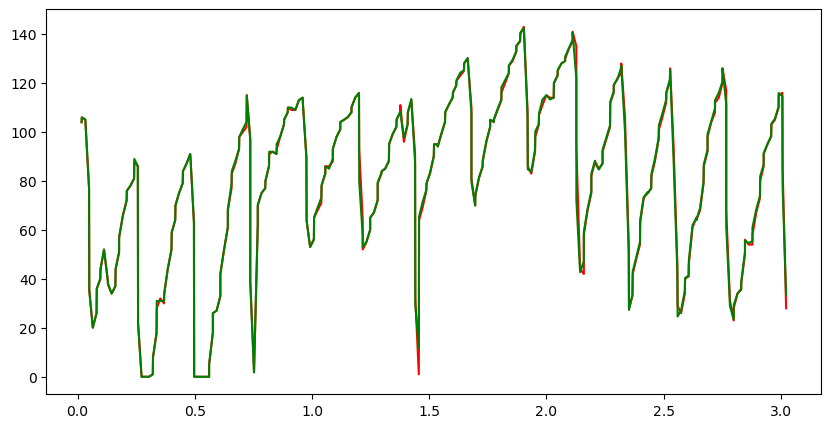

In [177]:
len = frames.__len__()
plt.figure(figsize=(10,5))
plt.plot(bvp_time_[:len],bvp1[:len], color='r')
plt.plot(bvp_time_[:len],bvp2[:len], color='g')

In [8]:
import pytesseract

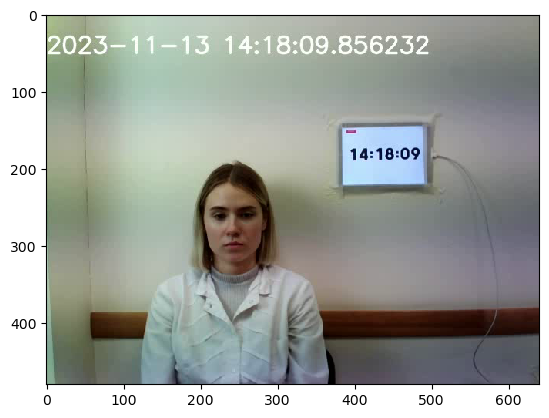

In [15]:
plt.imshow(frames[0])

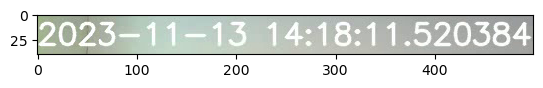

In [16]:
plt.imshow(frames[50][20:60,0:500])

'2023-11-13 14:18:11.520384\n'

In [15]:
' '.join(str1[0].split()[1:])

'2023-11-13 14:18:09.873186'

In [27]:

time1 = datetime.datetime.strptime(' '.join(str1[0].split()[1:]),'%Y-%m-%d %H:%M:%S.%f')

In [28]:
time2 = datetime.datetime.strptime(pytesseract.image_to_string(frames[50][20:60,0:500]).replace('\n',''),'%Y-%m-%d %H:%M:%S.%f')

In [29]:
time1,time2

(datetime.datetime(2023, 11, 13, 14, 18, 9, 873186),
 datetime.datetime(2023, 11, 13, 14, 18, 11, 520384))

In [35]:
(time2-time1).total_seconds()

1.647198

In [18]:
time_.timestamp()

1699859889.873186

In [16]:
datetime.datetime.strptime(pytesseract.image_to_string(frames[50][20:60,0:500]).replace('\n',''),'%Y-%m-%d %H:%M:%S.%f')

datetime.datetime(2023, 11, 13, 14, 18, 11, 520384)

In [ ]:
with open(ppg, "r") as f:
    str1 = f.read()
    str1 = str1.split("\n")[:-1]
    bvp = [float(x.split()[0]) for x in str1]
    inter = splrep(x=np.linspace(0, len, 100),y=bvp,k=3)
    bvp = splev(np.linspace(0, len, 30),inter)
bvp3 = bvp

In [2]:
def change(data):
    data['TEST']['DATA']['DO_PREPROCESS'] = True

    data['TEST']['DATA']['DATA_PATH'] = 'E:/FirstProj/mcd_rppg'
    data['TEST']['DATA']['CACHED_PATH'] = './data/Custom_cached'

    data['TEST']['DATA']['BEGIN'] = 0.0
    data['TEST']['DATA']['END'] = 0.001

    data['TEST']['DATA']['PREPROCESS']['CROP_FACE']['BACKEND'] = 'MP'
    return data

In [3]:
print('@')
for i in tqdm(glob.glob('./CustomConfigs/*.yaml')):
    with open(i) as fp:
        data = yaml.load(fp,Loader=yaml.FullLoader)
        data = change(data)
        fp.close()
    with open(i , "w") as f:
        yaml.dump(data, f)
    os.system(f'python main.py --config_file {i}')

100%|██████████| 4/4 [13:11<00:00, 197.87s/it]


In [2]:
LOCAL_DISK_MOUNT = 'E:\FirstProj\mcd_rppg'

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\XOPC\AppData\Local\Temp\ipykernel_19436\1636734756.py:1: SyntaxWarning: invalid escape sequence '\F'
  LOCAL_DISK_MOUNT = 'E:\FirstProj\mcd_rppg'


In [3]:
from huggingface_hub import snapshot_download
LOCAL_DISK_CACHE_DIR = f'{LOCAL_DISK_MOUNT}/hf_cache/'
snapshot_download(repo_id="kyegorov/mcd_rppg",local_dir=LOCAL_DISK_MOUNT,cache_dir=LOCAL_DISK_CACHE_DIR,repo_type="dataset")

Fetching 13204 files: 100%|██████████| 13204/13204 [2:51:53<00:00,  1.28it/s]  


'E:\\FirstProj\\mcd_rppg'

In [3]:
from rPPG_Toolbox.neural_methods.model import iBVPNet
import torch

In [14]:
model = iBVPNet.iBVPNet(160)
model.load_state_dict(torch.load('./rPPG_Toolbox/final_model_release/PURE_iBVPNet.pth',map_location='cpu'))

<All keys matched successfully>

In [15]:
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('model_scripted.pt') # Save

RuntimeError: Can't redefine method: forward on class: __torch__.rPPG_Toolbox.neural_methods.model.iBVPNet.iBVPNet (of Python compilation unit at: 00000168C1665AD0)

In [4]:
from datasets import load_dataset
 
LOCAL_DISK_CACHE_DIR = f'{LOCAL_DISK_MOUNT}/hf_cache/'
 
# set cache_dir to be in elastic disk
dataset = load_dataset("kyegorov/mcd_rppg", cache_dir=LOCAL_DISK_CACHE_DIR)

Generating train split: 2 examples [00:01,  1.25 examples/s]


DatasetGenerationError: An error occurred while generating the dataset

In [3]:
parser = rPPG_Toolbox.dataset.data_loader.BaseLoader

In [4]:
import numpy as np
from scipy.stats import gaussian_kde

In [14]:
np.matrix(xy)

matrix([[109.4941901 ,  88.8418154 ],
        [110.06596332,  92.24078273]])

In [19]:
xy = np.array([[109.4941901 ,  88.8418154 ],
       [110.06596332,  92.24078273]]).astype(np.float64)
#xy = np.matrix(xy)
gaussian_kde(xy)(xy)

array([52103.26720011, 52103.26720011])

In [21]:
np.linalg.eigh(np.cov(xy))[0]

array([1.42108547e-14, 3.72128822e+02])

In [23]:
np.eye(np.cov(xy))

TypeError: only integer scalar arrays can be converted to a scalar index

In [3]:
array = np.load('test.np.npy')

TypeError: Invalid shape (172800,) for image data

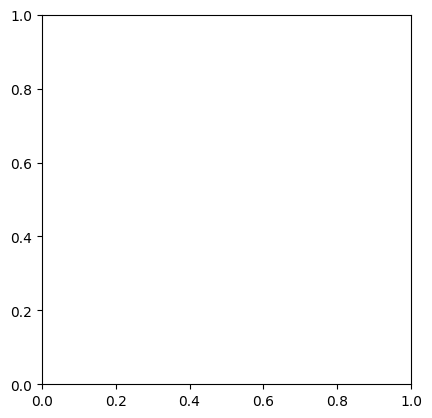

In [13]:
import mediapipe as mp
array2 = np.load('test2.np.npy').reshape()
mp.Image(image_format=mp.ImageFormat.SRGB, data=array)
plt.imshow(array)

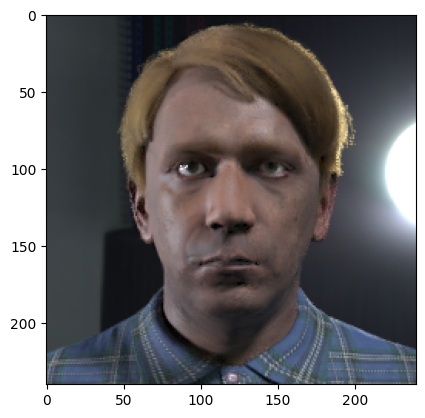

In [7]:
plt.imshow(array)